In [1]:
%matplotlib inline
import os
import pandas as pd
import torch
import torchvision
from d2l import torch as d2l


In [5]:
def read_data_bananas(is_train=True):
    csv_fname  = "../data/banana-detection/bananas_train/label.csv"
    csv_data = pd.read_csv(csv_fname)
    csv_data = csv_data.set_index("img_name")
    images,targets = [],[]
    for img_name,target in csv_data.iterrows():
        images.append(torchvision.io.read_image(f"../data/banana-detection/bananas_train/images/{img_name}"))
        targets.append(list(target))
    
    return images,torch.tensor(targets).unsqueeze(1)/256

In [6]:
class BananaDataset(torch.utils.data.Dataset):
    
    def __init__(self,is_train):
        self.features , self.labels = read_data_bananas(is_train)

        print("read")
    
    def __getitem__(self,idx):
        return (self.features[idx].float(),self.labels[idx])
    
    def __len__(self):
        return len(self.features)

In [8]:
def load_data_bananas(batch_size):
    train_iter = torch.utils.data.DataLoader(BananaDataset(is_train=True),batch_size=batch_size,shuffle=True)
    val_iter = torch.utils.data.DataLoader(BananaDataset(is_train=False),batch_size=batch_size,shuffle=False)
    return train_iter,val_iter

In [12]:
batch_size,edge_size = 32,256

train_iter,_ = load_data_bananas(batch_size)
batch = next(iter(train_iter))
# 本来 label中应该是 32，5  但是新加了一个维度表示每个图片最多有多少个物体
batch[0].shape,batch[1].shape

read
read


(torch.Size([32, 3, 256, 256]), torch.Size([32, 1, 5]))

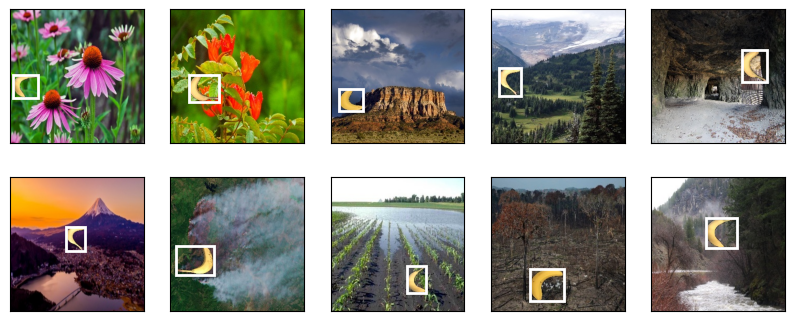

In [14]:
# tensor BCHW  numpy是 BHWC  交换维度
imgs = (batch[0][0:10].permute(0,2,3,1)) /255
axes = d2l.show_images(imgs,2,5,scale=2)
for ax,label in zip(axes,batch[1][0:10]):
    d2l.show_bboxes(ax,[label[0][1:5]*edge_size],colors=["w"])